# Project Overview
## Real World DataSet. 
In this project, we will be working with a CSV file that will use pandas to do some basic analysis. The data is from of Data Science lovers YouTube Channel, project 3 Police Dataset - https://youtu.be/GyUbo45mVSE?si=GZUrLFicWHqGinkQ

In [3]:
# Importing Pandas
import pandas as pd

In [4]:
data = pd.read_csv(r"C:\Users\PawPaw\Desktop\Data Science Projects\Police Data Project\file.csv")
# Best practice since the file is on my computer is to add the 'r' before the file path in order to compensate for the backslashes

### Data Cleaning
After inspecting the CSV file, there seems to be a column that only contains missing values. So we will remove it now before moving on to other questions related to the data. But first let's inspect the head element to see the view of the data as well. 

In [6]:
data.head(2)

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [7]:
data

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,12/6/2012,17:54,NaN,F,1987.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
65531,12/6/2012,22:22,NaN,M,1954.0,58.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
65532,12/6/2012,23:20,NaN,M,1985.0,27.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
65533,12/7/2012,0:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False


So there's over 65k rows with 15 columns in the data file. We can also see that country_name column has the null values we want to remove

In [9]:
data.isnull().sum()

stop_date                 0
stop_time                 0
country_name          65535
driver_gender          4061
driver_age_raw         4054
driver_age             4307
driver_race            4060
violation_raw          4060
violation              4060
search_conducted          0
search_type           63056
stop_outcome           4060
is_arrested            4060
stop_duration          4060
drugs_related_stop        0
dtype: int64

I can also see another column that has an a great deal of null values, search_type. 

In [11]:
data.drop(columns = 'country_name', inplace = True)
data.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


Now we can see that the country_name column is now removed and we can move forward

## Question 1 
### Based on filtering + value counts, in terms of speeding were Men or Women stopped more often?

In [14]:
data[data.violation == 'Speeding'].driver_gender.value_counts()

driver_gender
M    25517
F    11686
Name: count, dtype: int64

Now going to simply visualize this by importing the matplotlib to get this going. I'll just manually input the results into a new result variable to get the
pie chart made. 


In [16]:
import matplotlib.pyplot as plt

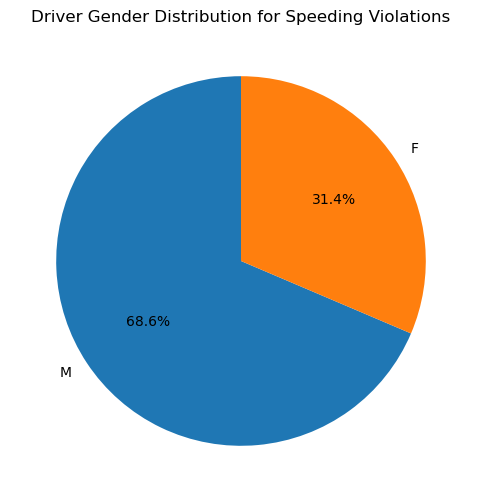

In [17]:
# Data from your result
traffic_result = {
    "M": 25517,
    "F": 11686
}

# Create the pie chart
labels = traffic_result.keys()
sizes = traffic_result.values()

# Configure the plot
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Driver Gender Distribution for Speeding Violations')

# Display the plot
plt.show()

Wonderful, not only do we have the raw numbers, but a simple visual to help the reader to see the difference in terms of gender. 

# Question 2 (group by)
## Does gender affect who gets searched during a stop?

In [32]:
data.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [34]:
data.groupby('driver_gender').search_conducted.sum()

driver_gender
F     366
M    2113
Name: search_conducted, dtype: int64

Again, a nice visual would be nice in this instance to help show off the scale of the differences in searches by gender. 

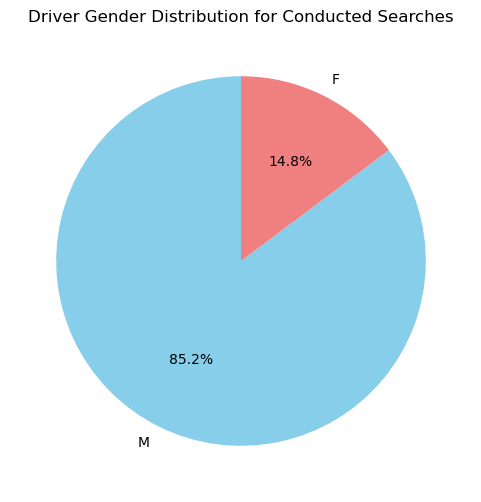

In [47]:
# Data from your result
search_result = {
    "M": 2113,
    "F": 366
}

# Create the pie chart
labels = search_result.keys()
sizes = search_result.values()
colors = ["skyblue", "lightcoral"]

# Configure the plot
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Driver Gender Distribution for Conducted Searches')

# Display the plot
plt.show()

# Question 3 (Mapping and data-type casting)
## What is the mean stop_duration?

In [50]:
data.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


The target for this analysis will be the stop_duration column, but it looks to be a string and of course, we can't get a mean of a string. 
So we need to first convert the values of the column by identifying the values we need to convert.

In [54]:
data.stop_duration.value_counts()

stop_duration
0-15 Min     47379
16-30 Min    11448
30+ Min       2647
2                1
Name: count, dtype: int64

In [58]:
# I will be taking the middle values of each measurement as the replacement as seen below
data['stop_duration'] = data['stop_duration'].map( {'0-15 Min': 7.5, '16-30 Min': 24, '30+ Min': 45 })

In [60]:
data.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False


I checked the head of the data and can see that the stop_duration column as the change I put in from above. Now we can answer the question. 


In [66]:
data['stop_duration'].mean()

12.187420698181345

# Question 4 (Groupby & Describe)
## Compare the age distributions for each violation 

In [69]:
data.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False


In [71]:
data.groupby('violation').driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,6507.0,31.682957,11.380671,16.0,23.0,28.0,39.0,81.0
Moving violation,11876.0,36.736443,13.258350,15.0,25.0,35.0,47.0,86.0
Other,3477.0,40.362381,12.754423,16.0,30.0,41.0,50.0,86.0
Registration/plates,2240.0,32.656696,11.150780,16.0,24.0,30.0,40.0,74.0
Seat belt,3.0,30.333333,10.214369,23.0,24.5,26.0,34.0,42.0
Speeding,37120.0,33.262581,12.615781,15.0,23.0,30.0,42.0,88.0
